<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = <font color='yellow'> 99102507 </font>
            <br />
            Name = <font color='yellow'> Amir Hossein  </font>
            <br />
            Last_Name = <font color='yellow'> Yari </font>
        </div>
        <div class="column">
        <br />
            student_number = <font color='yellow'> 99104232 </font>
            <br />
            Name = <font color='yellow'> Amir Hossein  </font>
            <br />
            Last_Name = <font color='yellow'> Moraveji </font>
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

In [10]:
# Download MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create dataloaders
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Function to add Gaussian noise to images
def add_noise(image, mean=0, std=0.1):
    noise = torch.randn_like(image) * std + mean
    noisy_image = image + noise
    return noisy_image

# Iterate over the dataloader and add noise to input images
noisy_train_dataset = []
for images, labels in train_dataloader:
    noisy_images = add_noise(images)
    noisy_train_dataset.append((noisy_images, labels))

# Define Your Model
torch neural network model

In [3]:
#Define the AutoEncoder architecture
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

<font color='yellow'>
The encoder consists of two linear layers with ReLU activations. The first linear layer takes the input of size 28$×$28 and maps it to a hidden layer of size 128.
The second linear layer maps the hidden layer to the latent code of size 64.<br>
The decoder consists of two linear layers with ReLU activations, but in reverse order. The first linear layer takes the latent code of size 64 and maps it to a hidden layer of size 128. The second linear layer maps the hidden layer to the output of size 28*28. The output is passed through a sigmoid activation to ensure that the values are between 0 and 1, representing pixel intensities.<br>
In the forward method, you define the forward pass of the network. You take the input x and pass it through the encoder to get the encoded representation encoded. Then you pass encoded through the decoder to get the reconstructed output decoded. You return decoded as the output of the network.
 </font>

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [4]:
# Instantiate the AutoEncoder model and define the loss function and optimizer:
autoencoder = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

#Train the AutoEncoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in noisy_train_dataset:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        # Forward pass
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs) #computes the loss function between the outputs and the inputs, which measures how well the autoencoder can reconstruct the original images.
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward() #computes the gradients of the loss with respect to the model parameters using backpropagation.
        optimizer.step() #updates the model parameters using the optimizer algorithm.
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


with torch.no_grad():
    autoencoder.eval() #sets the autoencoder model to evaluation mode.
    total_loss = 0
    for images, _ in test_dataloader:
        inputs = images.view(images.size(0), -1) #reshapes the images into vectors of size
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        total_loss += loss.item()
    avg_loss = total_loss / len(test_dataloader)
    print('Average Test Loss: {:.4f}'.format(avg_loss))


Epoch [1/10], Loss: 0.0276
Epoch [2/10], Loss: 0.0225
Epoch [3/10], Loss: 0.0206
Epoch [4/10], Loss: 0.0191
Epoch [5/10], Loss: 0.0182
Epoch [6/10], Loss: 0.0177
Epoch [7/10], Loss: 0.0172
Epoch [8/10], Loss: 0.0168
Epoch [9/10], Loss: 0.0164
Epoch [10/10], Loss: 0.0161
Average Test Loss: 0.0062


# Plot The Results

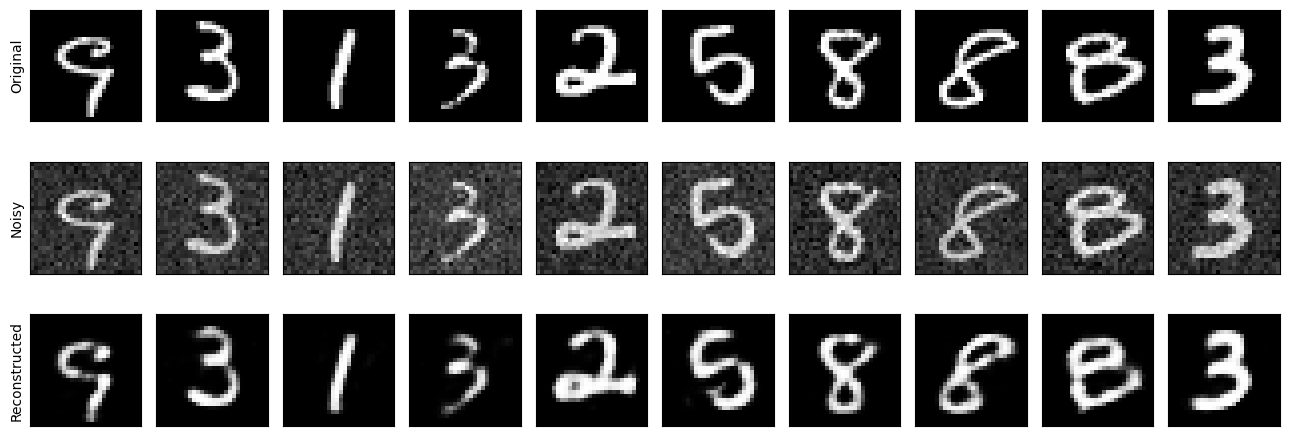

In [5]:
# Choose some random samples from the test dataset
num_samples = 10
random_indices = torch.randint(len(test_dataset), size=(num_samples,))
sample_images = torch.stack([test_dataset[i][0] for i in random_indices])
sample_noisy_images = add_noise(sample_images)

# Flatten the images
sample_images = sample_images.view(sample_images.size(0), -1)
sample_noisy_images = sample_noisy_images.view(sample_noisy_images.size(0), -1)

# Pass the images through the AutoEncoder to get reconstructed versions
reconstructed_images = autoencoder(sample_noisy_images)

# Reshape the images back to their original shape
sample_images = sample_images.view(sample_images.size(0), 1, 28, 28)
sample_noisy_images = sample_noisy_images.view(sample_noisy_images.size(0), 1, 28, 28)
reconstructed_images = reconstructed_images.view(reconstructed_images.size(0), 1, 28, 28)

# Convert tensors to numpy arrays for visualization
sample_images = sample_images.cpu().numpy()
sample_noisy_images = sample_noisy_images.cpu().numpy()
torch.set_grad_enabled(False)
reconstructed_images = reconstructed_images.cpu().numpy()

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(13, 5))
for i in range(10):
    axes[0, i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[1, i].imshow(sample_noisy_images[i].squeeze(), cmap='gray')
    axes[2, i].imshow(reconstructed_images[i].squeeze(), cmap='gray')
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Noisy')
axes[2, 0].set_ylabel('Reconstructed')
plt.tight_layout()
plt.show()

# PCA

In [25]:
# Import Necessary Libraries
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
# download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# set the mean and standard deviation of the noise
mean = 0
std = 25

# add Gaussian noise to the training set and test set
x_train_noisy = x_train + np.random.normal(mean, std, x_train.shape)
x_test_noisy = x_test + np.random.normal(mean, std, x_test.shape)

# reshape the noisy images to a 2D array
x_train_noisy_2d = x_train_noisy.reshape(x_train_noisy.shape[0], -1)
x_test_noisy_2d = x_test_noisy.reshape(x_test_noisy.shape[0], -1)

# create a PCA object with 100 components
pca = PCA(n_components=100)

# fit the PCA model to the noisy training set
pca.fit(x_train_noisy_2d)

# transform the noisy training set and test set using the PCA model
x_train_denoised_2d = pca.inverse_transform(pca.transform(x_train_noisy_2d))
x_test_denoised_2d = pca.inverse_transform(pca.transform(x_test_noisy_2d))

# reshape the denoised images back to their original shape
x_train_denoised = x_train_denoised_2d.reshape(x_train_noisy.shape)
x_test_denoised = x_test_denoised_2d.reshape(x_test_noisy.shape)

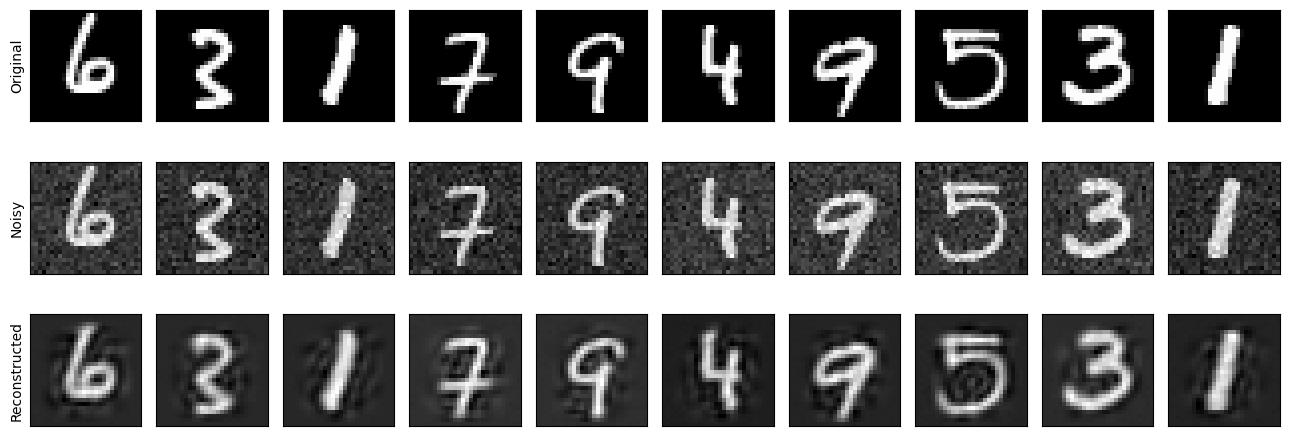

In [29]:
# select a random sample of images
idx = np.random.choice(x_test.shape[0], size=10, replace=False)

# plot the original images, noisy images, and reconstructed images
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(13, 5))
for i in range(10):
    axes[0, i].imshow(x_test[idx[i]], cmap='gray')
    axes[1, i].imshow(x_test_noisy[idx[i]], cmap='gray')
    axes[2, i].imshow(x_test_denoised[idx[i]], cmap='gray')
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])
    axes[2, i].set_xticks([])
    axes[2, i].set_yticks([])
axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('Noisy')
axes[2, 0].set_ylabel('Reconstructed')
plt.tight_layout()
plt.show()

<font color='yellow'>
There is a few reasons why denoising with autoencoders may outperform PCA in terms of accuracy:<br>
1) Non-linearity: Autoencoders have the ability to capture non-linear relationships in the data, which is important for denoising tasks. Images often contain complex patterns and structures that can be better captured by non-linear models like autoencoders.<br>
2) Reconstruction Ability: Autoencoders are trained to minimize the difference between the original and reconstructed data, resulting in better reconstruction accuracy. They learn to map noisy inputs to clean outputs, allowing them to recover more accurate denoised versions of the data.<br>
3) Flexibility: Autoencoders can be designed with multiple layers and complex architectures, allowing them to capture intricate details and variations in the data. In contrast, PCA relies on linear transformations and may not capture complex relationships as effectively.</font>